In [1]:
import pandas as pd 
import numpy as np 
import os
import sqlite3
from utility import save_to_csv,check_data_quality,plot_missing_percentage,save_sunburst_charts
pd.set_option('display.max_colwidth', None) 

### 1 First: explore the data

#### 1.1 Import Data

In [2]:
#import the data from data folder
df_products = pd.read_csv(os.path.join('data','PRODUCTS_TAKEHOME.csv'))
df_transaction = pd.read_csv(os.path.join('data','TRANSACTION_TAKEHOME.csv'))
df_user = pd.read_csv(os.path.join('data','USER_TAKEHOME.csv'))

#### 1.2 Overview of datasets

##### 1.2.1 Products Table

In [3]:
#overview of the datasets
check_data_quality(df_products)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
------------------------------------

Unique Data Types Per Column:
CATEGORY_1      [<class 'str'>, <class 'float'>]
CATEGORY_2      [<class 'str'>, <class 'float'>]
CATEGORY_3      [<class 'str'>, <class 'float'>]
CATEGORY_4      [<class 'str'>, <class 'float'>]
MANUFACTURER    [<class 'str'>, <class 'float'>]
BRAND           [<class 'str'>, <class 'float'>]
BARCODE                        [<class 'float'>]
dtype: object


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHANGEABLY.,MAPLE HOLISTICS,8.068109e+11


------------------------------------

Missing Values Summary:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64
------------------------------------

Total Duplicate Rows: 215
------------------------------------

Per-Column Duplicate Value Counts:
BRAND           7010
MANUFACTURER    3801
CATEGORY_3       288
BARCODE          185
CATEGORY_4       105
CATEGORY_2       101
CATEGORY_1        26
dtype: int64


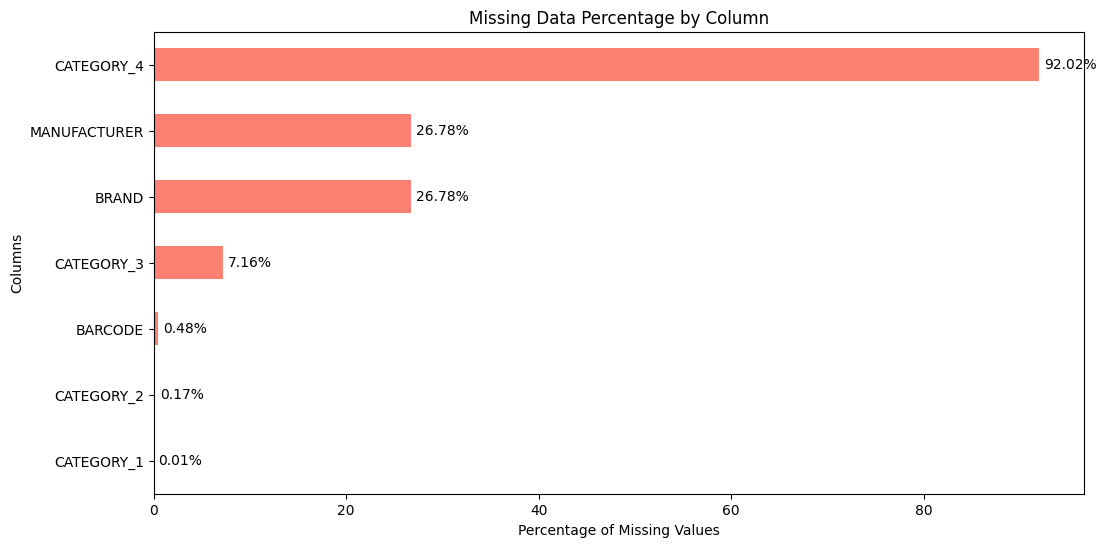

Chart for Health & Wellness saved to charts\sunburst_Health___Wellness.html
Chart for Snacks saved to charts\sunburst_Snacks.html
Chart for Beverages saved to charts\sunburst_Beverages.html
Chart for Pantry saved to charts\sunburst_Pantry.html
Chart for Alcohol saved to charts\sunburst_Alcohol.html
Chart for Apparel & Accessories saved to charts\sunburst_Apparel___Accessories.html
Chart for Restaurant saved to charts\sunburst_Restaurant.html
Chart for Needs Review saved to charts\sunburst_Needs_Review.html
Chart for Dairy saved to charts\sunburst_Dairy.html
Chart for Home & Garden saved to charts\sunburst_Home___Garden.html
Chart for unknown saved to charts\sunburst_unknown.html
Chart for Household Supplies saved to charts\sunburst_Household_Supplies.html
Chart for Meat & Seafood saved to charts\sunburst_Meat___Seafood.html
Chart for Deli & Bakery saved to charts\sunburst_Deli___Bakery.html
Chart for Sporting Goods saved to charts\sunburst_Sporting_Goods.html
Chart for Produce saved to

In [4]:
plot_missing_percentage(df_products)
save_sunburst_charts(df_products[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3']],cols = ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3'])

##### 1.2.2 Transaction Table

In [5]:
check_data_quality(df_transaction)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
------------------------------------

Unique Data Types Per Column:
      RECEIPT_ID  PURCHASE_DATE      SCAN_DATE     STORE_NAME        USER_ID  \
0  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>  <class 'str'>   

           BARCODE FINAL_QUANTITY     FINAL_SALE  
0  <class 'float'>  <class 'str'>  <class 'str'>  
------------------------------------

First

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


------------------------------------

Missing Values Summary:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
------------------------------------

Total Duplicate Rows: 171
------------------------------------

Per-Column Duplicate Value Counts:
RECEIPT_ID        24440
SCAN_DATE         24440
USER_ID           17694
BARCODE           11027
FINAL_SALE         1185
STORE_NAME          954
PURCHASE_DATE        89
FINAL_QUANTITY       43
dtype: int64


In [6]:
# From above info, we found Nan and zero value and also duplicated RECEIPT_ID in transaction table
print("Conclusion:")
print("Below are the duplicated transaction records, potentially caused by 'FINAL_QUANTITY' being 'zero' or 'FINAL_SALE' being NaN.")
print("\nTwo Situations:")
print("1. 'FINAL_QUANTITY' is 'zero': These rows might be treated as invalid or redundant entries where the quantity is recorded as zero, indicating a placeholder or erroneous data.")
print("2. 'FINAL_SALE' is NaN: These rows have missing or incomplete sale data, possibly due to scanning twice at the time of the transaction.")
print('For each receipt ID, it has only one unique user_id')
print(set(df_transaction.groupby(['RECEIPT_ID'])['USER_ID'].nunique().tolist()))
df_transaction[df_transaction.duplicated(subset=['RECEIPT_ID', 'PURCHASE_DATE','USER_ID'], keep=False)].sort_values('RECEIPT_ID').head(10)

Conclusion:
Below are the duplicated transaction records, potentially caused by 'FINAL_QUANTITY' being 'zero' or 'FINAL_SALE' being NaN.

Two Situations:
1. 'FINAL_QUANTITY' is 'zero': These rows might be treated as invalid or redundant entries where the quantity is recorded as zero, indicating a placeholder or erroneous data.
2. 'FINAL_SALE' is NaN: These rows have missing or incomplete sale data, possibly due to scanning twice at the time of the transaction.
For each receipt ID, it has only one unique user_id
{1}


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,1.00,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1.00,3.49
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,5.29
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


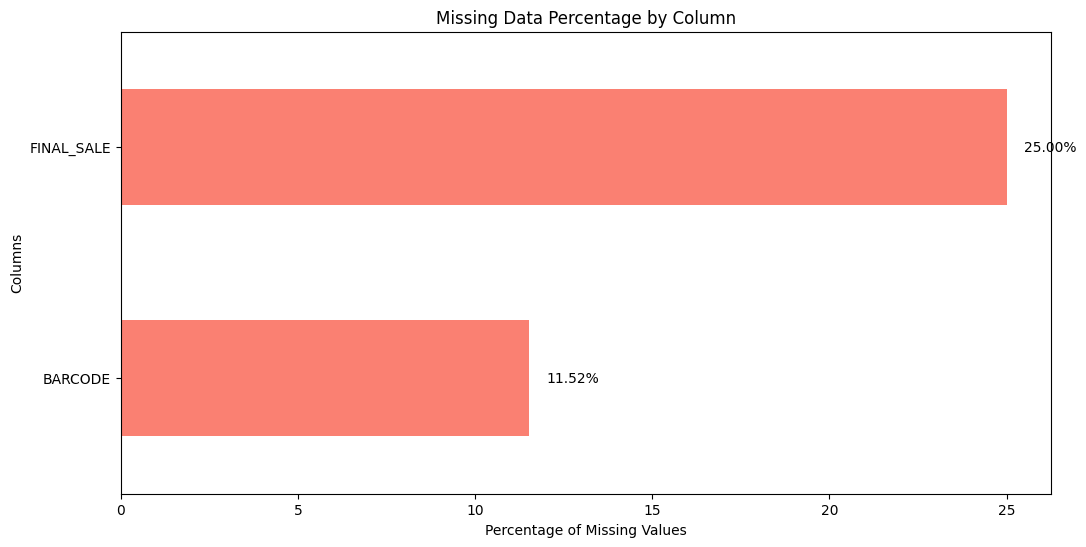

In [7]:
plot_missing_percentage(df_transaction)

##### 1.2.3 User Table

In [8]:
check_data_quality(df_user)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
------------------------------------

Unique Data Types Per Column:
ID                               [<class 'str'>]
CREATED_DATE                     [<class 'str'>]
BIRTH_DATE      [<class 'str'>, <class 'float'>]
STATE           [<class 'str'>, <class 'float'>]
LANGUAGE        [<class 'str'>, <class 'float'>]
GENDER          [<class 'str'>, <class 'float'>]
dtype: object
------------------------------------

First 5 Rows:


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


------------------------------------

Missing Values Summary:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
------------------------------------

Total Duplicate Rows: 0
------------------------------------

Per-Column Duplicate Value Counts:
BIRTH_DATE      22308
CREATED_DATE       58
STATE              52
GENDER             10
LANGUAGE            2
ID                  0
dtype: int64


In [9]:
#check the categorical data and we found the inconsistent data in Gender col
df_user[['STATE','LANGUAGE','GENDER']].apply(lambda col: col.dropna().unique())

STATE       [CA, PA, FL, NC, NY, IN, OH, TX, NM, PR, CO, AZ, RI, MO, NJ, MA, TN, LA, NH, WI, IA, GA, VA, DC, KY, SC, MN, WV, DE, MI, IL, MS, WA, KS, CT, OR, UT, MD, OK, NE, NV, AL, AK, AR, HI, ME, ND, ID, WY, MT, SD, VT]
LANGUAGE                                                                                                                                                                                                        [es-419, en]
GENDER                                                                 [female, male, non_binary, transgender, prefer_not_to_say, not_listed, Non-Binary, unknown, not_specified, My gender isn't listed, Prefer not to say]
dtype: object

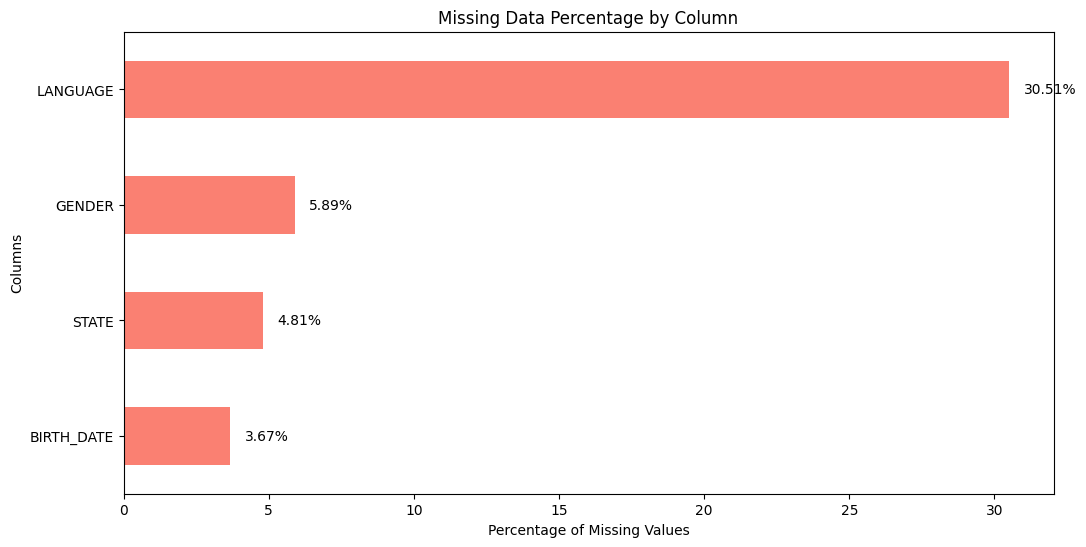

In [10]:
plot_missing_percentage(df_user)

#### 1.3 Data Quality Issues Summary

1. **Barcode in Scientific Notation**
- **Issue**: The `BARCODE` column contains large numbers represented in scientific notation (e.g., `7.964944e+11`).
- **Solution**: Convert the barcode values to strings without scientific notation for better readability. 

2. **Missing Values (NaN)**
- **Issue**: There are missing values (`NaN`) in the `BARCODE` and `CATEGORY_4`,`Gender`,`BIRTH_DATE`,`FINAL_QUANTITY` and etc columns, which may need to be handled.
- **Solution**: Fill missing values or drop rows if necessary depends on the requirement

3. **Duplicate Records**
- **Issue**: --1 Product and Transaction table have 215 and 171 duplicate rows separately.
             --2 In Transaction df, multiple rows share the same `RECEIPT_ID` but show inconsistent values in FINAL_QUANTITY and FINAL_SALE columns. 
             For example, rows 0 and 41567 have all the same cols except missing FINAL_SALE value while the other shows 1.54.
- **Solution**: Drop duplicates based on the entire rows.  Filter not Nan in FINAL_SALE and Non 'zero' in FINAL_QUANTITY

4. **Inconsistent Data Formatting in `FINAL_QUANTITY`**
- **Issue**: The `FINAL_QUANTITY` column has NaN and "zero" (as a string) entries.
- **Solution**: Delete the rows with "zero" string which caused the duplicate data

5. **Inconsistent Data Content**
- **Issue**: Columns like `GENDER` might have inconsistent formatting (e.g., inconsistent content, or inconsistent capitalization). 
- **Solution**: Ensure consistent formatting by cleaning up the text.


##### 1.3.1 Data Quality Processing

In [11]:
#1. Missing Values:drop rows with NaN in barcode col since it is the key in products and transaction
df_products_cleaned = df_products.dropna(subset = ['BARCODE'])
df_transaction_cleaned = df_transaction.dropna(subset = ['BARCODE'])
#2. Convert BARCODE to string without scientific notation and 
df_products_cleaned['BARCODE'] = df_products_cleaned['BARCODE'].apply(lambda x: "{:.0f}".format(x) )
df_transaction_cleaned['BARCODE'] = df_transaction_cleaned['BARCODE'].apply(lambda x: "{:.0f}".format(x) )
#3 Drop duplicates
df_products_cleaned = df_products_cleaned.drop_duplicates()
df_transaction_cleaned = df_transaction_cleaned.drop_duplicates()
#drop duplicates for receipt_id in transaction
df_transaction_cleaned.replace(' ', np.nan, inplace=True)
df_transaction_cleaned = df_transaction_cleaned[(df_transaction_cleaned['FINAL_QUANTITY'] != 'zero')&(df_transaction_cleaned['FINAL_SALE'].notna())]
# 4 gender mapping
gender_mapping = {
    'female': 'Female',
    'male': 'Male',
    'non_binary': 'Non-Binary',
    'prefer_not_to_say': 'Prefer not to say',
    'not_listed': 'My gender isn\'t listed',
    'unknown': 'My gender isn\'t listed',
    'not_specified': 'My gender isn\'t listed'
}
df_user['GENDER'] = df_user['GENDER'].map(gender_mapping).fillna("My gender isn't listed")

#save the cleaned datasets
save_to_csv(df_products_cleaned, 'Cleaned_Data', 'df_products_cleaned.csv')
save_to_csv(df_transaction_cleaned, 'Cleaned_Data', 'df_transaction_cleaned.csv')
save_to_csv(df_user, 'Cleaned_Data', 'df_user_cleaned.csv')


C:\Users\yaxin\AppData\Local\Temp\ipykernel_19780\1666669713.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yaxin\AppData\Local\Temp\ipykernel_19780\1666669713.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Folder 'Cleaned_Data' has been created or already exists.
File saved to: Cleaned_Data\df_products_cleaned.csv
Folder 'Cleaned_Data' has been created or already exists.
File saved to: Cleaned_Data\df_transaction_cleaned.csv
Folder 'Cleaned_Data' has been created or already exists.
File saved to: Cleaned_Data\df_user_cleaned.csv


#### 1.4 Are there any fields that are challenging to understand?

1. **Gender Column in User Table**
- **Issue**: After checking the app, I created the mapping for cleaning the data

### 2 First: Provide SQL queries

**Assumption**
The data quality issues have already be solved

In [12]:

#  create SQLite db connect
conn = sqlite3.connect(':memory:')  
cursor = conn.cursor()
# load data
df_products.to_sql('Products', conn, index=False, if_exists='replace')
df_transaction.to_sql('Transactions', conn, index=False, if_exists='replace')
df_user.to_sql('Users', conn, index=False, if_exists='replace')

100000

#### 2.1 Closed-ended questions

##### 2.1.1 What are the top 5 brands by receipts scanned among users 21 and over?

In [62]:
#If the top 5 counts ( receipt counts) have ties
'''
Assume all three tables in MySQL Database.Below is the code running in the jupyter notebook.
Files also shared in the folder
For SQL queries, replace Where clause by 
DATEDIFF(YEAR, BIRTH_DATE, GETUTCDATE()) - 
			CASE WHEN MONTH(BIRTH_DATE) > MONTH(GETUTCDATE()) OR 
                  (MONTH(BIRTH_DATE) = MONTH(GETUTCDATE()) AND DAY(BIRTH_DATE) > DAY(GETUTCDATE())) 
           THEN 1 ELSE 0 END >= 21
'''
#run the code below to get the top5 brands
query = """
WITH Ranked AS (
SELECT P1.BRAND,
      DENSE_RANK() OVER (ORDER BY COUNT(DISTINCT T1.RECEIPT_ID) DESC) AS ranking
FROM 'Transactions' AS T1
INNER JOIN Products AS P1 ON T1.BARCODE = P1.BARCODE
WHERE P1.BRAND IS NOT NULL AND T1.USER_ID IN (
--filter the 21+ users
      SELECT ID
      FROM Users
      WHERE
      (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE)) - 
      (strftime('%m', 'now') < strftime('%m', BIRTH_DATE) OR 
      (strftime('%m', 'now') = strftime('%m', BIRTH_DATE) AND strftime('%d', 'now') < strftime('%d', BIRTH_DATE))) >= 21
)
GROUP BY P1.BRAND
)
SELECT * FROM Ranked
WHERE ranking <= 5
"""
print('The tier ranking indicates that within the 21+ customers, NERDS CANDY and DOVE stand out as the top choices,\n',
     'while the other brands, though still relevant, occupy a secondary tier.\n',
     'This segmentation could help in targeting marketing strategies and product positioning specifically for the 21+ consumer group.')
result_2_1_1_1 = pd.read_sql(query, conn)
print(result_2_1_1_1)

The tier ranking indicates that within the 21+ customers, NERDS CANDY and DOVE stand out as the top choices,
 while the other brands, though still relevant, occupy a secondary tier.
 This segmentation could help in targeting marketing strategies and product positioning specifically for the 21+ consumer group.
                            BRAND  ranking
0                     NERDS CANDY        1
1                            DOVE        1
2                         TRIDENT        2
3                 SOUR PATCH KIDS        2
4                          MEIJER        2
5                       HERSHEY'S        2
6                     GREAT VALUE        2
7                       COCA-COLA        2
8                             UTZ        3
9                            TWIX        3
10                       TRESEMMÉ        3
11                       TOSTITOS        3
12                          SUAVE        3
13                    SPEED STICK        3
14             SNYDERS OF HANOVER        3
1

In [47]:
#no tiers
query = """
SELECT P1.BRAND, COUNT(DISTINCT T1.RECEIPT_ID) AS receipt_cnt
FROM 'Transactions' AS T1
INNER JOIN Products AS P1 ON T1.BARCODE = P1.BARCODE
WHERE P1.BRAND IS NOT NULL AND T1.USER_ID IN (
    SELECT ID
    FROM Users
    WHERE
    (strftime('%Y', 'now') - strftime('%Y', BIRTH_DATE)) - 
    (strftime('%m', 'now') < strftime('%m', BIRTH_DATE) OR 
    (strftime('%m', 'now') = strftime('%m', BIRTH_DATE) AND strftime('%d', 'now') < strftime('%d', BIRTH_DATE))) >= 21
)
GROUP BY P1.BRAND
ORDER BY receipt_cnt DESC
LIMIT 5;
"""
result_2_1_1_2 = pd.read_sql(query, conn)
print('Without applying tier-based segmentation, NERDS CANDY and DOVE appear to be the most frequently purchased brands in this group.\n')
print(result_2_1_1_2)

Without applying tier-based segmentation, NERDS CANDY and DOVE appear to be the most frequently purchased brands in this group

             BRAND  receipt_cnt
0      NERDS CANDY            3
1             DOVE            3
2          TRIDENT            2
3  SOUR PATCH KIDS            2
4           MEIJER            2


##### 2.1.2 What are the top 5 brands by sales among users that have had their account for at least six months?

In [61]:
query = """
SELECT P1.BRAND
	  ,SUM(FINAL_QUANTITY * FINAL_SALE) AS Total_sales
FROM Transactions AS T1
    INNER JOIN Products AS P1 ON T1.BARCODE = P1.BARCODE
WHERE P1.BRAND IS NOT NULL AND 
    T1.FINAL_QUANTITY <> 'zero' AND 
    T1.FINAL_SALE <> ' ' AND
	T1.USER_ID IN (
	SELECT ID
    FROM Users
    WHERE REPLACE(CREATED_DATE, ' Z', '') <= datetime('now', '-6 months')

)
GROUP BY P1.BRAND
ORDER BY Total_sales DESC
LIMIT 5

"""
# Execute the query and load the result into a DataFrame
result_2_1_2= pd.read_sql_query(query, conn)

# Display the result
print('The result clearly shows CVS as the dominant brand, while DOVE TRIDENT, SOUR PATCH KIDS, and MEIJER having a smaller share of the market.\n')
print(result_2_1_2)

The result clearly shows CVS as the dominant brand, while DOVE TRIDENT, SOUR PATCH KIDS, and MEIJER having a smaller share of the market.

         BRAND  Total_sales
0          CVS        72.00
1         DOVE        30.91
2     TRESEMMÉ        29.16
3      TRIDENT        23.36
4  COORS LIGHT        17.48


#### 2.2 Open-ended questions

##### 2.2.1 Who are Fetch’s power users?

**Defining "Power Users"**

Since we have the account creation date and transaction dates, we can define power users based on one or more of these metrics:

**Total Transaction Count**
- **Definition:** Users who have made a high number of transactions since their account was created.

**Transaction Frequency**
- **Definition:** Users who, on average, make many transactions per month.
- **Note:** This metric normalizes the transaction count by the number of months (or weeks) since account creation.

**Recency or Engagement Trends**
- **Definition:** For instance, users who have transacted very recently or have increased activity over time.
- **Note:** This may involve time-series analysis which would be easier to solve in the jupyter.

In [38]:
#Total Transaction Count
query = """
WITH Trans_rnk AS(
SELECT  USER_ID,
	COUNT(DISTINCT PURCHASE_DATE) AS Total_Trans,
    DENSE_RANK()OVER(ORDER BY COUNT(DISTINCT PURCHASE_DATE) DESC) AS rnk
FROM Users
INNER JOIN Transactions   on Transactions.USER_ID = Users.ID

GROUP BY USER_ID
ORDER BY COUNT(DISTINCT PURCHASE_DATE) DESC)
SELECT USER_ID
FROM Trans_rnk
WHERE rnk = 1

"""
# Execute the query and load the result into a DataFrame
result_2_2_1= pd.read_sql_query(query, conn)

# Display the result
print(result_2_2_1)

                    USER_ID
0  6528a0a388a3a884364d94dc
1  62ffec490d9dbaff18c0a999
2  62c09104baa38d1a1f6c260e
3  61a58ac49c135b462ccddd1c
4  610a8541ca1fab5b417b5d33
5  5c366bf06d9819129dfa1118


In [64]:
#Transaction Frequency
query = """
SELECT 
    U1.ID,
    U1.CREATED_DATE,
    COUNT(DISTINCT T1.RECEIPT_ID) AS transaction_count,
    ((CAST(strftime('%Y','now') AS INTEGER) - CAST(strftime('%Y', U1.CREATED_DATE) AS INTEGER)) * 12 
     + (CAST(strftime('%m','now') AS INTEGER) - CAST(strftime('%m', U1.CREATED_DATE) AS INTEGER))) AS months_active,
    CASE 
        WHEN (
            (CAST(strftime('%Y','now') AS INTEGER) - CAST(strftime('%Y', U1.CREATED_DATE) AS INTEGER)) * 12 
            + (CAST(strftime('%m','now') AS INTEGER) - CAST(strftime('%m', U1.CREATED_DATE) AS INTEGER))
        ) = 0 
        THEN COUNT(DISTINCT T1.RECEIPT_ID)
        ELSE ROUND(
            COUNT(DISTINCT T1.RECEIPT_ID) * 1.0 / (
                (CAST(strftime('%Y','now') AS INTEGER) - CAST(strftime('%Y', U1.CREATED_DATE) AS INTEGER)) * 12 
                + (CAST(strftime('%m','now') AS INTEGER) - CAST(strftime('%m', U1.CREATED_DATE) AS INTEGER))
            ), 2
        )
    END AS transactions_per_month
FROM 
    Users U1
INNER JOIN 
    Transactions T1 ON U1.ID = T1.USER_ID
GROUP BY 
    U1.ID, U1.CREATED_DATE
ORDER BY 
    transactions_per_month DESC;
"""
# Execute the query and load the result into a DataFrame
result_2_2_1= pd.read_sql_query(query, conn)
summary = (
    "Low Transaction Activity:\n"
    "Most users have only 1–3 transactions overall.\n\n"
    "Varied Account Age:\n"
    "Account ages range from as low as 7 months to as high as 91 months.\n\n"
    "Low Transaction Frequency:\n"
    "Even though some users have been active for a long time, the monthly transaction rate is very low (mostly around 0.01 to 0.29 transactions per month).\n\n"
    "Conclusion:\n"
    "Overall, the data suggests that users are not very active, with only a few users having slightly higher transaction frequency, particularly among newer accounts.\n"
)

print(summary)
# Display the result
print(result_2_2_1.head(5))

Low Transaction Activity:
Most users have only 1–3 transactions overall.

Varied Account Age:
Account ages range from as low as 7 months to as high as 91 months.

Low Transaction Frequency:
Even though some users have been active for a long time, the monthly transaction rate is very low (mostly around 0.01 to 0.29 transactions per month).

Conclusion:
Overall, the data suggests that users are not very active, with only a few users having slightly higher transaction frequency, particularly among newer accounts.

                         ID               CREATED_DATE  transaction_count  \
0  6682b24786cc41b000ce5e77  2024-07-01 13:42:31.000 Z                  2   
1  6621691d89578edd4a10fb06  2024-04-18 18:40:29.000 Z                  2   
2  6528a0a388a3a884364d94dc  2023-10-13 01:42:59.000 Z                  3   
3  6661ed1e7c0469953bfc76c4  2024-06-06 17:08:46.000 Z                  1   
4  6668f2257c0469953bfd6e45  2024-06-12 00:56:05.000 Z                  1   

   months_active  tr

In [58]:
print('From above two methods, 6 users have the same transactions and  user 6682b24786cc41b000ce5e77 has highest Transaction Activity by month')

From above two methods, 6 users have the same transactions and  user 6682b24786cc41b000ce5e77 has highest Transaction Activity by month


##### 2.2.2 Which is the leading brand in the Dips & Salsa category?

In [57]:
#Assumption: Here we use the Total quantity as the performance evaluation
query = """
SELECT P1.BRAND
	,SUM(FINAL_QUANTITY ) AS Total_quantity
	,SUM(FINAL_QUANTITY * FINAL_SALE) AS Total_sales
FROM Transactions AS T1
INNER JOIN Products AS P1 ON T1.BARCODE = P1.BARCODE
WHERE CATEGORY_2 = 'Dips & Salsa' AND BRAND IS NOT NULL
GROUP BY P1.BRAND
ORDER BY Total_quantity DESC,Total_sales DESC
LIMIT 10
"""
# Execute the query and load the result into a DataFrame
result_2_2_2= pd.read_sql_query(query, conn)
summary = (
    "TOSTITOS leads with the highest quantity (60 units) and the highest total sales ($197.24), indicating strong overall performance.\n"
    "Good Foods has a relatively low quantity (16 units) but high sales ($94.91), suggesting a higher sales value per unit.\n"
)

print(summary)
# Display the result
print(result_2_2_2)


TOSTITOS leads with the highest quantity (60 units) and the highest total sales ($197.24), indicating strong overall performance.
Good Foods has a relatively low quantity (16 units) but high sales ($94.91), suggesting a higher sales value per unit.

                  BRAND  Total_quantity  Total_sales
0              TOSTITOS            60.0       197.24
1                  PACE            38.0        85.75
2                FRITOS            33.0        73.76
3            MARKETSIDE            23.0        65.22
4         HIDDEN VALLEY            22.0        76.38
5      DEAN'S DAIRY DIP            22.0        39.95
6          HELUVA GOOD!            20.0        53.98
7              MARZETTI            19.0        51.14
8  FRESHNESS GUARANTEED            17.0        46.66
9            GOOD FOODS            16.0        94.91


### 3 Communicate with stakeholders

Subject: Quick Data Quality & Insights Update

Hi stakeholders,

Below is a brief update on our data quality and some insights from our analysis:

**Data Quality Overview:**

- **Barcodes:**  
  Currently displayed in scientific notation. We plan to convert them to plain strings for better readability.
  
- **Missing Data:**  
  Several key fields (e.g., Barcode, Gender) contain gaps. We need to decide whether to impute missing values or drop incomplete records.
  
- **Duplicates:**  
  There are duplicate rows and inconsistent transaction details. Filtering and specific rules for resolving these issues are recommended.
  
- **Formatting:**  
  Some text fields (e.g., Gender) lack standardization, which requires cleanup.

**Key Insights:**

- Among 21+ shoppers, **NERDS CANDY** and **DOVE** are the most frequently purchased brands.
- Overall sales data shows **CVS** as the dominant brand, with **DOVE**, **TRIDENT**, **SOUR PATCH KIDS**, and **MEIJER** capturing smaller market shares.

These findings suggest that while certain brands are popular among 21+ customers, CVS drives the majority of revenue.

**Next Steps / Additional Information Needed:**

To clean and analyze the data effectively, I need your guidance on the following:
- A data dictionary detailing each field.
- How to handle missing values: should we impute or drop them?
- Rules for resolving duplicate records, especially when transaction data conflicts.
- Any formatting standards we should adopt (e.g., for BARCODE and GENDER).

Your input on these points will help us resolve the outstanding issues.

Let me know your thoughts.

Best regards,  
Yaxin
